<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [3]:
from bs4 import BeautifulSoup
import requests

url = 'https://raw.githubusercontent.com/shmilyface/DS-Unit-4-Sprint-1-NLP/master/module2-vector-representations/data/job_listings.csv'

df = pd.read_csv(url)

result = requests.get(url)

df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [4]:
# applies the soup function
def soup(x):
    ''' takes code, parses using bs4, general cleanse, returns code'''
    x = eval(x).decode()
    x = BeautifulSoup(x, 'html.parser').get_text()
    x = re.sub(r"\r?\n", ' ', x)
    return x

In [5]:
# creating and applying the soup function to that row: 
df['description'] = [soup(x['description']) for _, x in df.iterrows()]

In [6]:
# removing other html stuff from description. 
import re

def strip_html(text):
    ''' strips text of pesky html tags'''
    strip = re.sub("b'", '', text)
    strip = re.sub('b"', '', text)
    strip = re.sub("\n", ' ', text)
    strip = re.sub('–', '', text)
    return strip

In [7]:
# making everything lowercase: 
df['description'] = df['description'].apply(lambda x: x.lower())

# visualizing the changes so far:
df.head()

,Unnamed: 0,description,title
0,0,job requirements: conceptual understanding in ...,Data scientist
1,1,"job description as a data scientist 1, you wi...",Data Scientist I
2,2,as a data scientist you will be working on con...,Data Scientist - Entry Level
3,3,"$4,969 - $6,756 a monthcontractunder the gener...",Data Scientist
4,4,location: usa – multiple locations 2+ years of...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [9]:
# importing the spacy tokenizer
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# instantiating the tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [11]:
# using the tokenizer on the dataset with description of job data:
tokens = []

for doc in tokenizer.pipe(df['description'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [12]:
#visualizing the changes:
df['tokens'].head()

0    [job, requirements:, conceptual, understanding...
1    [job, description,  , as, a, data, scientist, ...
2    [as, a, data, scientist, you, will, be, workin...
3    [$4,969, -, $6,756, a, monthcontractunder, the...
4    [location:, usa, –, multiple, locations, 2+, y...
Name: tokens, dtype: object

In [ ]:
token.lemma

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [14]:
# importing the CountVectorizer: 
from sklearn.feature_extraction.text import CountVectorizer

# instantiating it: 
vectore = CountVectorizer(stop_words='english')

# fitting it:
vectore.fit(df['description'])

# creating sparse dtm: 
dtm = vectore.transform(df['description'])

# to pandas dataframe: 
dtm = pd.DataFrame(dtm.todense(), columns=vectore.get_feature_names())

# visualizing dtm:
dtm.head()

,00,000,02115,03,0305,0356,04,062,06366,08,...,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich,ﬁeld,ﬁnd,ﬁndings
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [15]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('and', 11548),
 ('to', 6808),
 ('the', 5512),
 ('of', 4545),
 ('data', 3914),
 ('a', 3574),
 ('in', 3554),
 ('with', 3056),
 (' ', 2225),
 ('for', 2035)]

In [16]:
def counter(docs):
        #create counters
        word_counts = Counter()
        appears_in = Counter()
        
        #length of docs/x
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc)) #? (stating its in a set w/in doc?)
        
        #creates a temp dictionary with word counts
        temp = zip(word_counts.keys(), word_counts.values())
        
        #creates wc df with columns word, and count
        wc = pd.DataFrame(temp, columns = ['word', 'count'])
      
        #add column named rank, method=first
        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()
       
        #create a function to do word/ total sum variable made above
        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        #sort values by rank
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()
        
        # ^cum. sum of percent total, v create zip of appears_in Counter
        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [18]:
# applying the above function: 
wc = counter(df['tokens'])

# visualizing the changes: 
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
58,and,425,11548,1.0,0.055214,0.055214,0.997653
15,to,422,6808,2.0,0.032551,0.087765,0.990610
356,the,414,5512,3.0,0.026354,0.114120,0.971831
35,of,420,4545,4.0,0.021731,0.135851,0.985915
54,data,421,3914,5.0,0.018714,0.154564,0.988263


In [19]:
# creating a stop words: 
STOP_WORDS = nlp.Defaults.stop_words.union(['data', ' ',])

In [20]:
#tokenizing words by looking at the stop words list
tokens = []

for doc in tokenizer.pipe(df['description'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [21]:
# visualizing the changes made: 
wc = counter(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
67,experience,401,1668,1.0,0.012805,0.012805,0.941315
64,work,350,1063,2.0,0.008161,0.020966,0.821596
245,business,303,1052,3.0,0.008076,0.029042,0.711268
177,team,325,787,4.0,0.006042,0.035084,0.762911
37,learning,271,676,5.0,0.005190,0.040273,0.636150


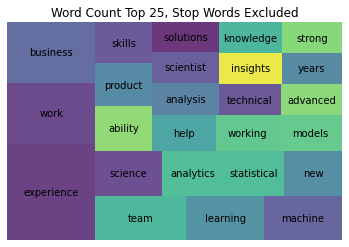

In [22]:
# visualizing the top 25 words in descriptions of data scientists: 
import squarify

wc_top25 = wc[wc['rank'] <= 25]

squarify.plot(sizes=wc_top25['pct_total'], label=wc_top25['word'], alpha=.8 )
plt.axis('off')
plt.title('Word Count Top 25, Stop Words Excluded')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object, uses english stop words
tfidf = TfidfVectorizer(stop_words='english')

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(df['description'])

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,00,000,02115,03,0305,0356,04,062,06366,08,...,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich,ﬁeld,ﬁnd,ﬁndings
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.106253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [24]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [25]:
nn.kneighbors([dtm.iloc[0].values])


(array([[0.        , 1.27841777, 1.31011584, 1.31817281, 1.31919977]]),
 array([[  0, 276, 274, 338, 366]], dtype=int64))

In [26]:
nn.kneighbors([dtm.iloc[276]])


(array([[0.        , 1.01893529, 1.07128668, 1.21626608, 1.24009301]]),
 array([[276, 301, 392, 327, 201]], dtype=int64))

In [27]:
df['description'][276]

"facebook's mission is to give people the power to build community and bring the world closer together. through our family of apps and services, we're building a different kind of company that connects billions of people around the world, gives them ways to share what matters most to them, and helps bring people closer together. whether we're creating new products or helping a small business expand its reach, people at facebook are builders at heart. our global teams are constantly iterating, solving problems, and working together to empower people around the world to build community and connect in meaningful ways. together, we can help people build stronger communities — we're just getting started. the infrastructure strategy group is responsible for the strategic analysis to support and enable the continued growth critical to facebook’s infrastructure organization. the ideal candidate will be passionate about facebook, have strong analytical and modeling aptitude and has experience u

In [28]:
job_desc = [''' Computational Biology, half biology wetlab and half dry lab data science''']


In [30]:
new = tfidf.transform(job_desc)

In [31]:
nn.kneighbors(new.todense())

(array([[1.33760759, 1.35221594, 1.35954914, 1.3698722 , 1.3793707 ]]),
 array([[329, 194,  21,  65, 115]], dtype=int64))

In [32]:
df['description'][329]


'company overview the complex ecosystem of bacteria that comprise our gut microbiome are inextricably tied to the overall quality of human health. comet medicine is a new start-up company poised to leverage the power of active microbial communities to address high unmet medical needs. our approach lies at the intersection of microbiology, chemistry, and genomics and uniquely enables us to harness the power of the microbiome and define the potential of this new therapeutic modality.  comet was founded by two leading academics in the microbiome field (stanford professors michael fischbach and dylan dodd) as well as venrock, one of the oldest venture capital funds in the united states.  description of role we are currently seeking an experienced and highly motivated data scientist to build and oversee the internal bioinformatics/metagenomics platform at comet. a core focus is the analysis of metagenomic data from communities of gut bacteria, as well as the development, evaluation and impl

In [33]:
df['description'][194]


"as a data scientist, you will evaluate and improve appzen's products. you will collaborate with a multi-disciplinary team of engineers and analysts on a wide range of problems. this position will bring analytical rigor and statistical methods to the challenges of measuring quality, improving consumer products, and understanding the behavior of end-users, advertisers, and publishers.  appzen is and always will be an ml/ai based company. we hire people with a broad set of technical skills who are ready to take on some of technology's greatest challenges and make an impact on millions, if not billions, of users. at appzen, data scientists not only revolutionize search, they routinely work on massive scalability and storage solutions, large-scale applications and entirely new platforms for developers around the world. minimum requirements: bs degree in cs, ee or quantitative discipline (e.g., statistics, operations research, bioinformatics, economics, computational biology,, mathematics, 

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 